In [1]:
# Importing necessary libraries for data processing and visualizing
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [3]:
# get titanic & test csv files as a DataFrame
train_df = pd.read_csv("F:/ML/Kaggle/Titanic/train.csv")
test_df    = pd.read_csv("F:/ML/Kaggle/Titanic/test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Visualization

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

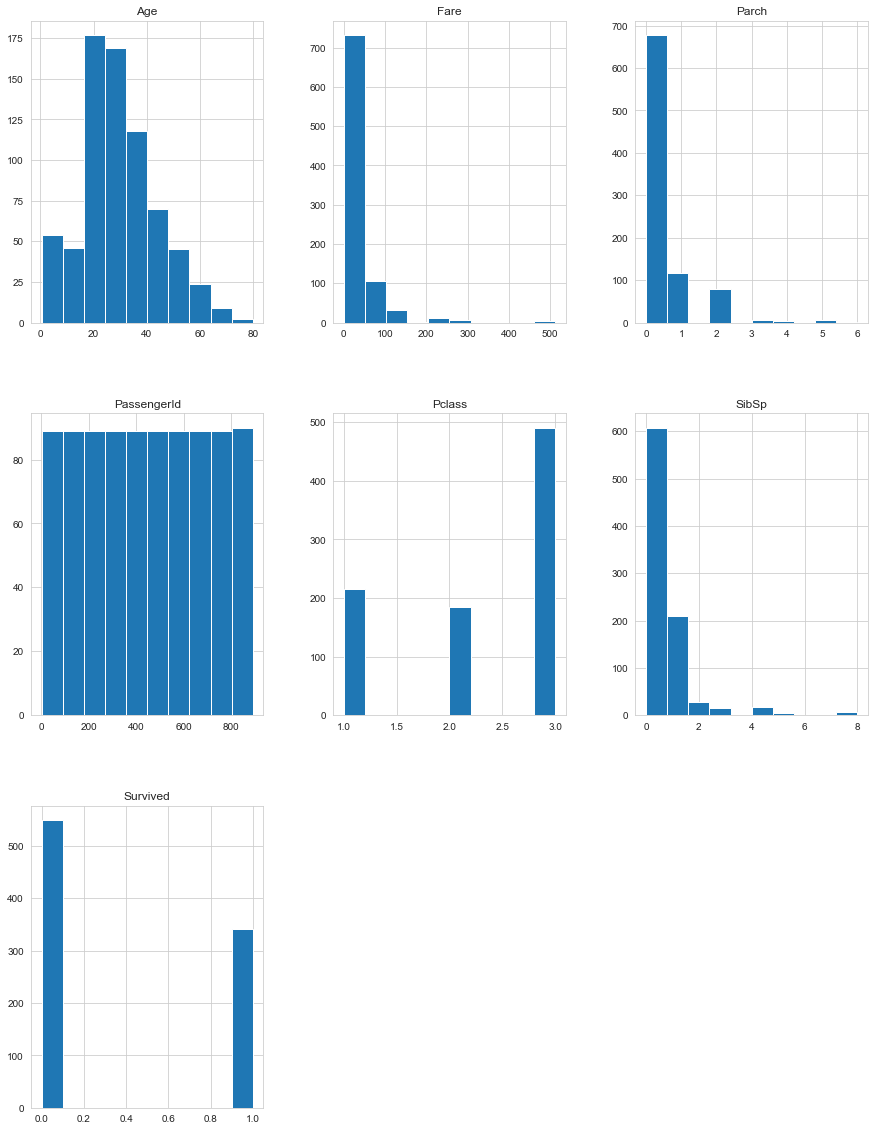

In [6]:
# histograms
train_df.hist(figsize=(15,20))
plt.show()

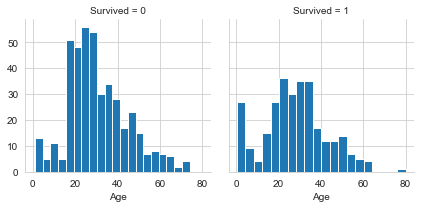

In [7]:
# Age distribution based on survival
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

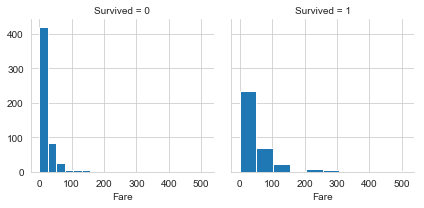

In [8]:
# Fare distribution based on survival
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Fare', bins=10)

In [9]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

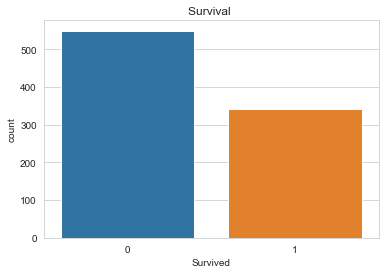

In [10]:
sns.countplot(x='Survived', data=train_df)
plt.ylabel("count")
plt.title("Survival ")
plt.show()

In [11]:
train_df.groupby(['Sex','Pclass'])['Survived'].count()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Survived, dtype: int64

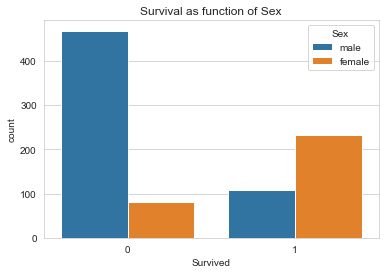

In [12]:
# Distribution of survival based on sex
sns.countplot(x='Survived',hue = 'Sex', data=train_df)
plt.ylabel("count")
plt.title("Survival as function of Sex")
plt.show()

In [13]:
train_df.groupby(['Sex','Survived','Pclass'])['Survived'].count()

Sex     Survived  Pclass
female  0         1           3
                  2           6
                  3          72
        1         1          91
                  2          70
                  3          72
male    0         1          77
                  2          91
                  3         300
        1         1          45
                  2          17
                  3          47
Name: Survived, dtype: int64

C:\Users\DELL\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


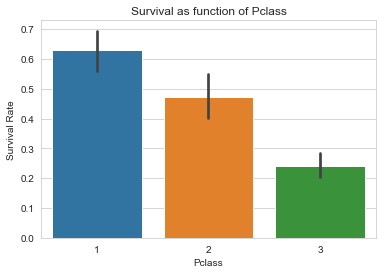

In [14]:
# Distribution of survival based on Pclass
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass")
plt.show()

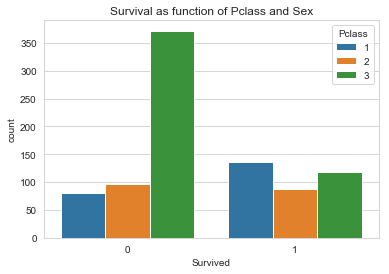

In [15]:
sns.countplot( x='Survived', hue='Pclass', data=train_df)
plt.ylabel("count")
plt.title("Survival as function of Pclass and Sex")
plt.show()

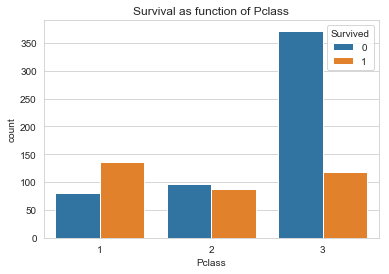

In [16]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.ylabel("count")
plt.title("Survival as function of Pclass")
plt.show()

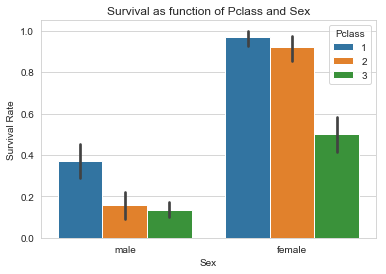

In [17]:
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Pclass and Sex")
plt.show()

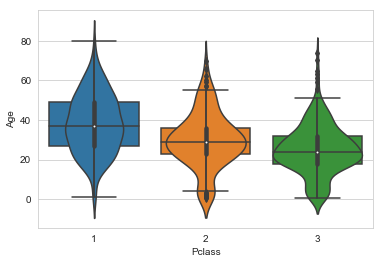

<Figure size 432x288 with 0 Axes>

In [18]:
ax= sns.boxplot(x="Pclass", y="Age", data=train_df)
sns.violinplot(train_df['Pclass'],train_df['Age'])
plt.show()
sns.despine()

In [19]:
train_df.groupby(['Embarked','Survived'])['Survived'].count()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: Survived, dtype: int64

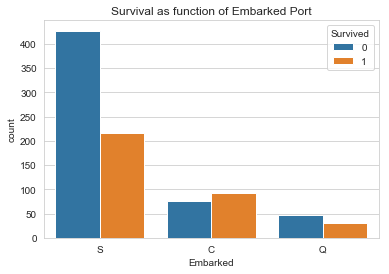

In [20]:
# Visualizing survival based on embarkation
sns.countplot(x='Embarked', hue ='Survived', data=train_df)
plt.ylabel("count")
plt.title("Survival as function of Embarked Port")
plt.show()

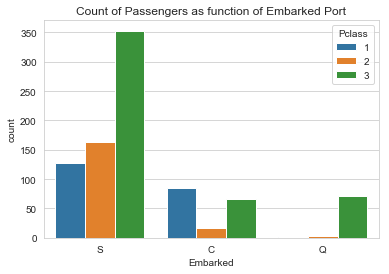

In [21]:
sns.countplot(x='Embarked', hue='Pclass', data=train_df)
plt.title("Count of Passengers as function of Embarked Port")
plt.show()

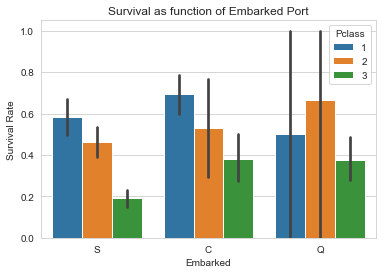

In [22]:
sns.barplot(x='Embarked', y='Survived', hue='Pclass', data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival as function of Embarked Port")
plt.show()

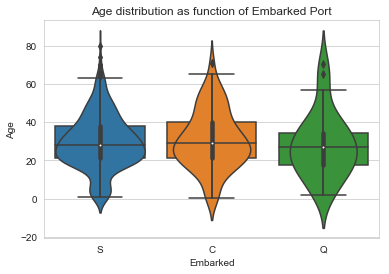

In [23]:
sns.boxplot(x='Embarked', y='Age', data=train_df)
sns.violinplot(x='Embarked', y='Age', data=train_df)
plt.title("Age distribution as function of Embarked Port")
plt.show()

C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\DELL\Anaconda3\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


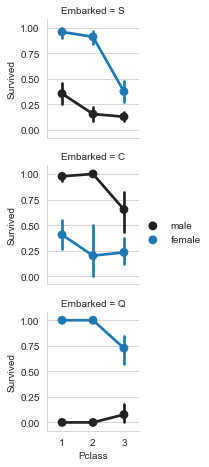

In [24]:
g = sns.FacetGrid(train_df, row='Embarked', height=2.2)
g.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
g.add_legend()


In [25]:
train_df.groupby(['SibSp','Survived'])['Survived'].count()

SibSp  Survived
0      0           398
       1           210
1      0            97
       1           112
2      0            15
       1            13
3      0            12
       1             4
4      0            15
       1             3
5      0             5
8      0             7
Name: Survived, dtype: int64

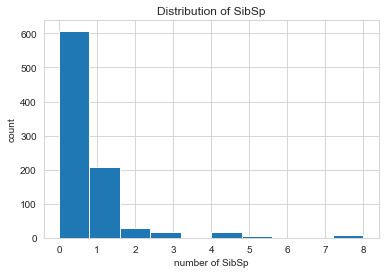

In [26]:
# Distribution of SibSp
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(train_df['SibSp'],bins = 10)
plt.title("Distribution of SibSp")
plt.xlabel("number of SibSp")
plt.ylabel("count")
plt.show()

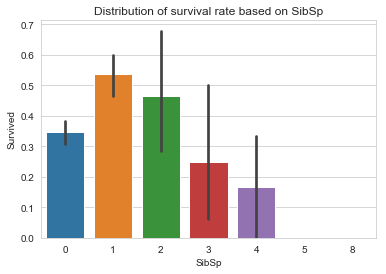

In [27]:
sns.barplot('SibSp','Survived', data=train_df)
plt.title("Distribution of survival rate based on SibSp")
plt.show()

In [28]:
train_df.groupby(['Parch','Survived'])['Survived'].count()

Parch  Survived
0      0           445
       1           233
1      0            53
       1            65
2      0            40
       1            40
3      0             2
       1             3
4      0             4
5      0             4
       1             1
6      0             1
Name: Survived, dtype: int64

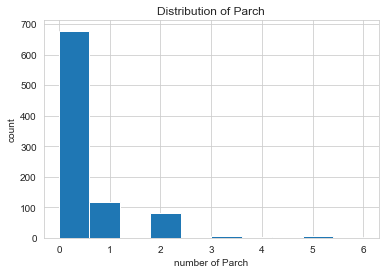

In [29]:
# histogram
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(train_df['Parch'],bins = 10)
plt.title("Distribution of Parch")
plt.xlabel("number of Parch")
plt.ylabel("count")
plt.show()

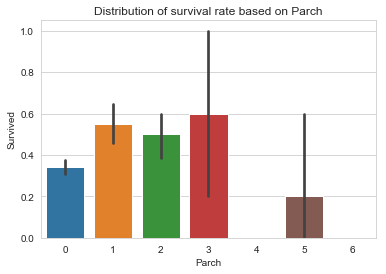

In [30]:
# Distribution of Parch
sns.barplot('Parch','Survived', data=train_df)
plt.title("Distribution of survival rate based on Parch")
plt.show()

# Data Preprocessing

In [31]:
# finding number of missing values
train_df.apply(lambda x : sum(x.isnull()),axis= 0)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [32]:
# Dropping Cabin column because it has 77% missing data
# Dropping Ticket number as it is unnecessary for model training
train_df = train_df.drop(['Ticket','PassengerId','Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)

In [33]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


 Filling missing values of 'Embarked'

In [34]:
train_df.groupby(['Embarked'])['Survived'].count()

Embarked
C    168
Q     77
S    644
Name: Survived, dtype: int64

In [35]:
#replacing the missing values in the Embarked feature with S
train_df = train_df.fillna({"Embarked": "S"})

In [36]:
combine = [train_df,test_df]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Creating a new feature  from existing features

In [37]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
    'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
train_df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [38]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


Converting categorical titles to numericals

In [39]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Now we can drop the name 

In [40]:
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [41]:
#mapping each Sex value to a numerical value
sex_mapping = {"male": 0, "female": 1}
for dataset in combine :
   dataset['Sex'] = dataset['Sex'].map(sex_mapping)
   
print(train_df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked  Title
0         0       3    0  22.0      1      0   7.2500        S      1
1         1       1    1  38.0      1      0  71.2833        C      3
2         1       3    1  26.0      0      0   7.9250        S      2
3         1       1    1  35.0      1      0  53.1000        S      3
4         0       3    0  35.0      0      0   8.0500        S      1


In [42]:
#map each Embarked value to a numerical value
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train_df['Embarked'] = train_df['Embarked'].map(embarked_mapping)
test_df['Embarked'] = test_df['Embarked'].map(embarked_mapping)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,1,1
1,1,1,1,38.0,1,0,71.2833,2,3
2,1,3,1,26.0,0,0,7.9250,1,2
3,1,1,1,35.0,1,0,53.1000,1,3
4,0,3,0,35.0,0,0,8.0500,1,1


Filling missing value of fare

In [43]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           417 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
dtypes: float64(2), int64(7)
memory usage: 29.5 KB


In [44]:
test_df = test_df.fillna(train_df['Fare'].mean())

Age:
    
    
As higher number of values of 'Age' are missing, it will be illogical to replace them with single values, so I will create an array of random numbers, which lie between the mean and the standard deviation

In [45]:
combine = [train_df, test_df]

for dataset in combine :
    mean = train_df["Age"].mean()
    std = train_df["Age"].std()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std)
    # fill NaN values in Age column with random values generated
    age = dataset["Age"].copy()
    age[np.isnan(age)] = rand_age
    dataset["Age"] = age
    dataset["Age"] = train_df["Age"].astype(int)

In [46]:
train_df['Age'].isnull().sum()

0

In [47]:
test_df['Age'].isnull().sum()

0

In [48]:
# checking for missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int32
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null int64
Title       891 non-null int64
dtypes: float64(1), int32(1), int64(7)
memory usage: 59.2 KB


In [49]:
# checking for missing values
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int32
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
Embarked       418 non-null int64
Title          418 non-null int64
dtypes: float64(1), int32(1), int64(7)
memory usage: 27.8 KB


Age Group:    
    
Now we group the 'Age feature into 6 groups'. But it isn't that easy, because if we cut the range of the age values into a few equally big categories, upto 80% of the values may fall into one category. Fortunately, we can use pandas'  "qcut()" function. The 'qcut' ensures a more even distribution of the values in each bin even if they cluster in the sample space

In [50]:
train_df['AgeBand'] = pd.qcut(train_df['Age'], 6, duplicates='drop')
train_df[['AgeBand', 'Survived']].groupby(['AgeBand']).mean().sort_values(by='AgeBand', ascending=True)

,Survived
AgeBand,
"(-0.001, 19.0]",0.481707
"(19.0, 25.0]",0.328467
"(25.0, 32.0]",0.408163
"(32.0, 43.0]",0.351097
"(43.0, 80.0]",0.370968


In [51]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 19, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 19) & (dataset['Age'] <= 25), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 32), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 38), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 38) & (dataset['Age'] <= 40), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 80), 'Age'] = 5
    dataset.loc[ dataset['Age'] > 80.0, 'Age'] = 5
train_df.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
886,0,2,0,2,0,0,13.00,1,5,"(25.0, 32.0]"
887,1,1,1,0,0,0,30.00,1,2,"(-0.001, 19.0]"
888,0,3,1,5,1,2,23.45,1,2,"(32.0, 43.0]"
889,1,1,0,2,0,0,30.00,2,1,"(25.0, 32.0]"
890,0,3,0,2,0,0,7.75,3,1,"(25.0, 32.0]"


In [52]:
train_df = train_df.drop(['AgeBand'], axis=1)

In [53]:
# Seeing the distribution of age
train_df['Age'].value_counts()

5    325
0    164
2    147
1    137
3     89
4     29
Name: Age, dtype: int64

Fare:
    
For the 'Fare' feature, we need to do the same as with the 'Age' feature.

In [54]:
train_df['FareGroup'] = pd.qcut(train_df['Fare'], 6, duplicates='drop')


In [55]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareGroup
0,0,3,0,1,1,0,7.2500,1,1,"(-0.001, 7.775]"
1,1,1,1,3,1,0,71.2833,2,3,"(52.369, 512.329]"
2,1,3,1,2,0,0,7.9250,1,2,"(7.775, 8.662]"
3,1,1,1,3,1,0,53.1000,1,3,"(52.369, 512.329]"
4,0,3,0,3,0,0,8.0500,1,1,"(7.775, 8.662]"


In [56]:
train_df[['FareGroup', 'Survived']].groupby(['FareGroup']).mean().sort_values(by='FareGroup', ascending=True)

,Survived
FareGroup,
"(-0.001, 7.775]",0.205128
"(7.775, 8.662]",0.190789
"(8.662, 14.454]",0.366906
"(14.454, 26.0]",0.436242
"(26.0, 52.369]",0.417808
"(52.369, 512.329]",0.697987


In [57]:
combine = [train_df, test_df]

for dataset in combine :
    dataset.loc[ dataset['Fare'] <= 7.775, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.775) & (dataset['Fare'] <= 8.662), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 8.662) & (dataset['Fare'] <= 14.454), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 26.0), 'Fare']  = 3
    dataset.loc[(dataset['Fare'] > 26.0) & (dataset['Fare'] <= 52.369), 'Fare']  = 4
    dataset.loc[(dataset['Fare'] > 52.369) & (dataset['Fare'] <= 512.329), 'Fare'] = 5
    dataset.loc[(dataset['Fare'] > 512.329), 'Fare'] = 5                                          
    dataset['Fare'] = dataset['Fare'].astype(int)

In [58]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FareGroup
0,0,3,0,1,1,0,0,1,1,"(-0.001, 7.775]"
1,1,1,1,3,1,0,5,2,3,"(52.369, 512.329]"
2,1,3,1,2,0,0,1,1,2,"(7.775, 8.662]"
3,1,1,1,3,1,0,5,1,3,"(52.369, 512.329]"
4,0,3,0,3,0,0,1,1,1,"(7.775, 8.662]"


In [59]:
train_df = train_df.drop(['FareGroup'], axis=1)

In [60]:
train_df['Fare'].value_counts()

3    156
0    156
5    149
4    146
2    145
1    139
Name: Fare, dtype: int64

Creating new feature 'Relatives'

In [61]:
combine = [train_df,test_df]
for dataset in combine:
    dataset['Relatives'] = dataset['SibSp'] + dataset['Parch'] 



In [62]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Relatives
0,0,3,0,1,1,0,0,1,1,1
1,1,1,1,3,1,0,5,2,3,1
2,1,3,1,2,0,0,1,1,2,0
3,1,1,1,3,1,0,5,1,3,1
4,0,3,0,3,0,0,1,1,1,0


In [63]:
train_df[['Relatives', 'Survived']].groupby(['Relatives'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Relatives,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [64]:
train_df['Relatives'].value_counts()
    

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Relatives, dtype: int64

In [65]:
train_df = train_df.drop(['SibSp','Parch'],axis = 1)
test_df = test_df.drop(['SibSp','Parch'],axis = 1)

In [66]:
train_df.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Relatives
0,0,3,0,1,0,1,1,1
1,1,1,1,3,5,2,3,1
2,1,3,1,2,1,1,2,0
3,1,1,1,3,5,1,3,1
4,0,3,0,3,1,1,1,0
5,0,3,0,5,1,3,1,0
6,0,1,0,5,4,1,1,0
7,0,3,0,0,3,1,4,4
8,1,3,1,2,2,1,3,2
9,1,2,1,0,4,2,3,1


In [67]:
combine = [train_df,test_df]
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Relatives'] == 0, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


Creating new feature 'Age_Class' which is Age*Class

In [68]:
combine = [train_df, test_df]
for dataset in combine :
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']
train_df.head(20)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,Relatives,IsAlone,Age_Class
0,0,3,0,1,0,1,1,1,0,3
1,1,1,1,3,5,2,3,1,0,3
2,1,3,1,2,1,1,2,0,1,6
3,1,1,1,3,5,1,3,1,0,3
4,0,3,0,3,1,1,1,0,1,9
5,0,3,0,5,1,3,1,0,1,15
6,0,1,0,5,4,1,1,0,1,5
7,0,3,0,0,3,1,4,4,0,0
8,1,3,1,2,2,1,3,2,0,6
9,1,2,1,0,4,2,3,1,0,0


In [69]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Sex            418 non-null int64
Age            418 non-null int32
Fare           418 non-null int32
Embarked       418 non-null int64
Title          418 non-null int64
Relatives      418 non-null int64
IsAlone        418 non-null int64
Age_Class      418 non-null int64
dtypes: int32(2), int64(8)
memory usage: 29.5 KB


In [70]:
test_df = test_df.drop(['PassengerId'],axis  = 1)

# Building Machine Learning Models 

In [71]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df

Logistic Regression

In [72]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train.values.ravel())

Y_pred = logreg.predict(X_test)

acc_log =logreg.score(X_train, Y_train)*100
print(acc_log, "%")

81.81818181818183 %


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


K-NN

In [73]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

acc_knn = knn.score(X_train, Y_train) * 100
print(acc_knn, "%")

87.31762065095398 %


Decision Tree

In [74]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred = decision_tree.predict(X_test)

acc_decision_tree = decision_tree.score(X_train, Y_train) * 100
print(acc_decision_tree,2, "%")

90.23569023569024 2 %


SVM

In [75]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = linear_svc.score(X_train, Y_train) * 100
print(acc_linear_svc,2, "%")

81.3692480359147 2 %


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Naive Bayes

In [76]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

Y_pred = nb.predict(X_test)
acc_nb = nb.score(X_train, Y_train) * 100
print(acc_nb, "%")

79.12457912457911 %


Random Forest

In [77]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = random_forest.score(X_train, Y_train) * 100
print(acc_random_forest, "%")

90.23569023569024 %


In [78]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_nb, 
               acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
90.235690,Random Forest
90.235690,Decision Tree
87.317621,KNN
81.818182,Logistic Regression
81.369248,Support Vector Machines
79.124579,Naive Bayes


Conclusion :

Random Forest Model is the model with the best accuracy compared to other algorithms used here